# Parte II: Convolutional Network

Nancy Patricia Girón Muñoz - Carné: 19007078

Se utilizo un data set de mnist y proviene de la libreria keras. Nos da 70,000 imagenes en el dataset, 60,000 para train y 10,000 restantes para test.



**Importamos los paquetes**

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

Using TensorFlow backend.


Separación de la data en train y test

11493376/11490434 [==============================] - 0s 0us/step


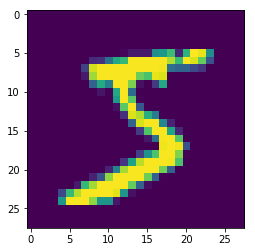

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0])

Chequeamos el tamaño de la imagen

In [5]:
X_train[0].shape

(28, 28)

Cambiamos el tamaño de la data para el modelo.

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
#one-hot encode
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Modelo**

In [8]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_p = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=1000)
model.predict(X_test[:4])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 158s 3ms/step - loss: 1.7623 - acc: 0.8171 - val_loss: 0.1115 - val_acc: 0.9662
Epoch 2/3
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0789 - acc: 0.9751 - val_loss: 0.0687 - val_acc: 0.9791
Epoch 3/3
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0441 - acc: 0.9864 - val_loss: 0.0647 - val_acc: 0.9807


array([[1.22070141e-08, 2.86953759e-11, 7.19368870e-07, 1.75479522e-06,
        5.40705393e-13, 1.41724010e-09, 8.05693928e-15, 9.99997258e-01,
        1.67761883e-07, 5.67407454e-08],
       [7.58447140e-06, 4.17033807e-05, 9.99850392e-01, 2.98459581e-05,
        7.97402500e-09, 3.13731596e-10, 5.03971787e-05, 2.50174777e-11,
        2.00717495e-05, 2.12971252e-10],
       [9.77629043e-07, 9.99886632e-01, 6.03322815e-06, 5.68802818e-07,
        3.96262949e-05, 7.67284291e-06, 2.70474698e-06, 1.14817813e-05,
        4.42261044e-05, 7.89974521e-08],
       [9.99817073e-01, 1.55573976e-09, 7.68659083e-06, 1.03263176e-07,
        6.21273921e-10, 3.71294995e-08, 1.92643583e-05, 3.29420686e-08,
        1.28583721e-07, 1.55747461e-04]], dtype=float32)

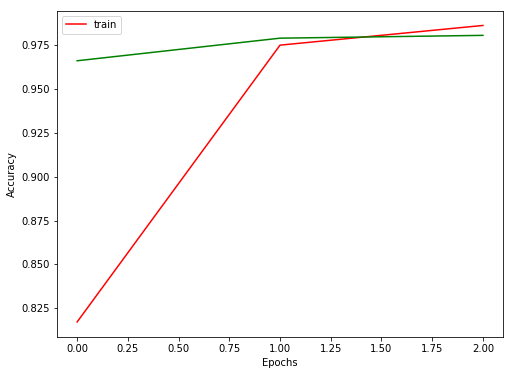

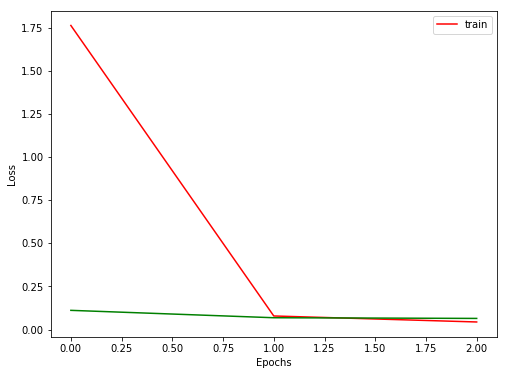

In [11]:
y_test[:4]

plt.figure(0)  
plt.plot(model_p.history['acc'],'r')  
plt.plot(model_p.history['val_acc'],'g')   
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Epochs")  
plt.ylabel("Accuracy")   
plt.legend(['train'])

plt.figure(1)  
plt.plot(model_p.history['loss'],'r')  
plt.plot(model_p.history['val_loss'],'g')    
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Epochs")  
plt.ylabel("Loss")   
plt.legend(['train'])

plt.show()

**Conclusion**

Se ajusta el modelo de redes neuronales convuncionales para clasificar las imagenes. Como se observa en las imagenes de accuracy y de loss se logro una precision arriba del 80% lo cual es un buen resultados ya que se logro predecir las imagenes. Es importante el uso de checkpoints para guardar estados de entrenamiento siempre se puede mejorar el modelo con diversos metodos. 
